# BLACK FRIDAY SALES PROJECT


## Elaborative Data Analysis

## Problem Statement:
 A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for a selected high volume products from last month. We need to build a model which will predict the purchase amount of the products. This is a regression problem.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
traindf = pd.read_csv(r"traindf.csv")
testdf = pd.read_csv(r"testdf.csv")

In [3]:
traindf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
testdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
traindf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
testdf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [7]:
print('Train Shape: ',traindf.shape)
print('Test Shape: ',testdf.shape)

Train Shape:  (550068, 12)
Test Shape:  (233599, 11)


In [8]:
print("Train data info:")
traindf.info()
print(" ")
print("Test data info:")
testdf.info()

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ 

In [9]:
import pandas_profiling as pp
report = pp.ProfileReport(traindf)
report.to_file('profile_report.html')

### If we analyse the data set feature wise, we can see that we do not have any information regarding the stores. We have been provided with the information related to the customer such as Age group, Gender, Occupation and Marital status. On the other hand, we have data on 3 types of city’s purchase rate and how many years the customer has lived in it whereas on the product’s side there is only information regarding the categories of the product and the amount spent on it respectively.

# Exploratory Data Analysis

## Let us take a look at some relations of the data feature wise

### Correlation with respect to Purchase

In [10]:
corr_matrix = traindf.corr()
corr_matrix["Purchase"]

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

In [11]:
corrIndex = traindf.corr().nlargest(10,'Purchase')['Purchase'].index
corr = traindf[corrIndex].corr()

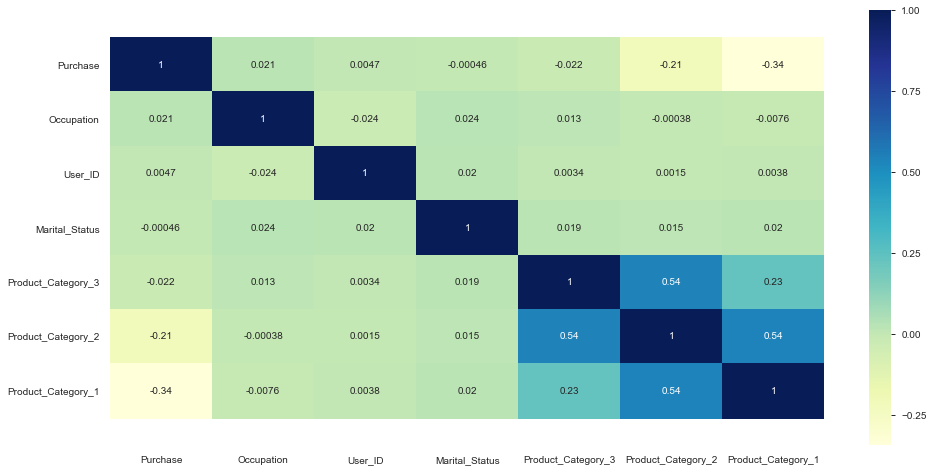

In [12]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr,annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Text(0.5, 1.0, 'Purchase amount Distribution')

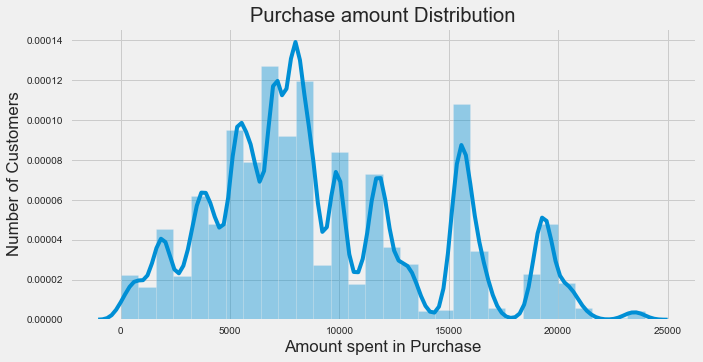

In [13]:
plt.style.use(style = 'fivethirtyeight')
plt.figure(figsize=(10,5))
sns.distplot(traindf['Purchase'], bins = 30)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Customers')
plt.title('Purchase amount Distribution')

In [14]:
traindf['User_ID'].nunique()

5891

## User_ID column shows that 5891 different users have purchased an item from the store.

In [15]:
traindf['Product_ID'].nunique()

3631

## Product_ID columns shows that 3631 different products were sold during the black friday sales.

### Feature - 'Product_ID'  (histogram)

Text(0, 0.5, 'Total Purchase Value')

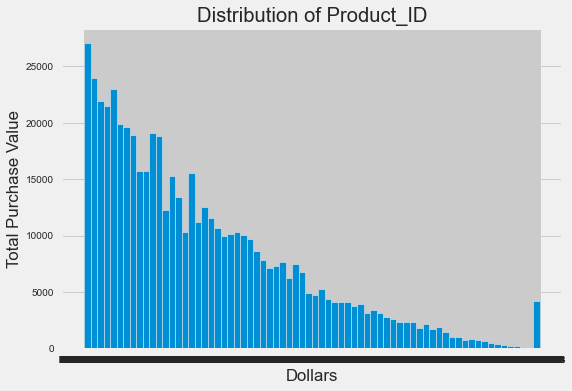

In [16]:
plt.hist(traindf['Product_ID'],bins = 70);
plt.title('Distribution of Product_ID');
plt.xlabel('Dollars')
plt.ylabel('Total Purchase Value')

### Feature - 'Gender' (Pie chart)

In [17]:
malesPurchaserData = traindf.loc[traindf['Gender'] == 'M']
femalesPurchaserData = traindf.loc[traindf['Gender'] == 'F']

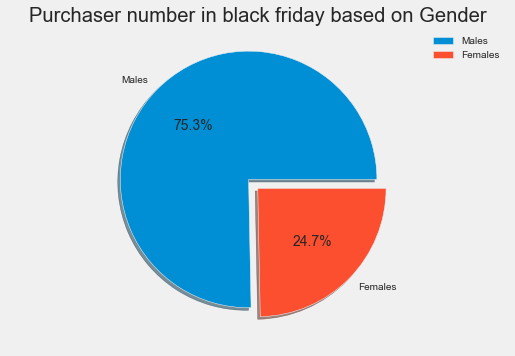

In [18]:
genderCountData = [malesPurchaserData.shape[0],femalesPurchaserData.shape[0]]
labels=['Males','Females']
plt.axis('equal')

plt.pie(genderCountData, labels=labels,
              explode=[0.1,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchaser number in black friday based on Gender')
plt.show()

## Men purchase more than Women. Surprising ha!?

### Feature - 'Age'  (countplot)

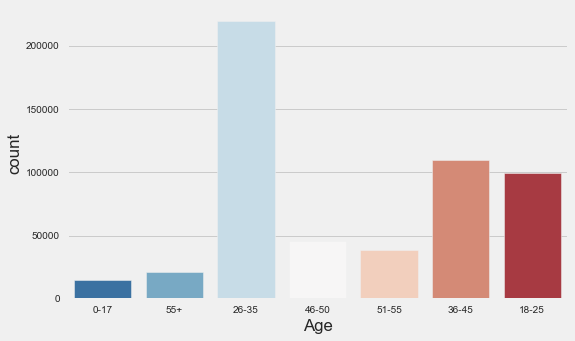

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=traindf, palette='RdBu_r')

## People of age 26-35 purchase more than others

### Feature - 'Occupation'  (Countplot)

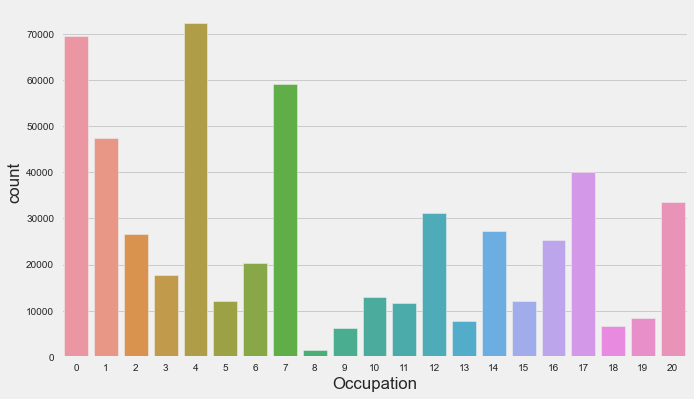

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(traindf.Occupation)

## Occupation 0 and 4 have the highest count. Maybe they have higher paying jobs.

### Feature - 'City_Category'  (Pie chart)

In [21]:
city_A = traindf.loc[traindf['City_Category'] == 'A']
city_B = traindf.loc[traindf['City_Category'] == 'B']
city_C = traindf.loc[traindf['City_Category'] == 'C']

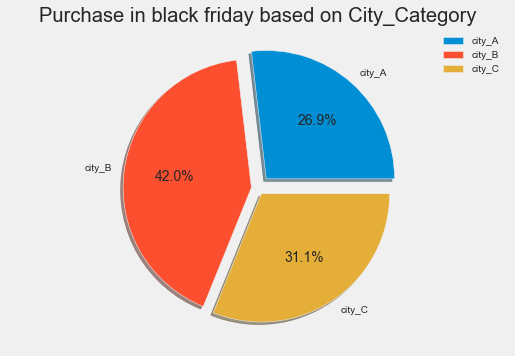

In [22]:
City = [city_A.shape[0],city_B.shape[0],city_C.shape[0]]
labels=['city_A','city_B','city_C']
plt.axis('equal')
plt.pie(City, labels=labels,
              explode=[0.1,0.05,0.05],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchase in black friday based on City_Category')
plt.show()

## People in city B purchased more than people in City A & City C

### Feature - 'Stay_In_Current_City_Years'  (Historgram plot)

In [23]:
def citystay(stay):
    if stay == '0':
        return 0
    elif stay == '1':
        return 1
    elif stay == '2':
        return 2
    elif stay == '3':
        return 3
    else:
        return 4
traindf['Stay_In_Current_City_Years'] = traindf['Stay_In_Current_City_Years'].apply(citystay)
testdf['Stay_In_Current_City_Years'] = testdf['Stay_In_Current_City_Years'].apply(citystay)

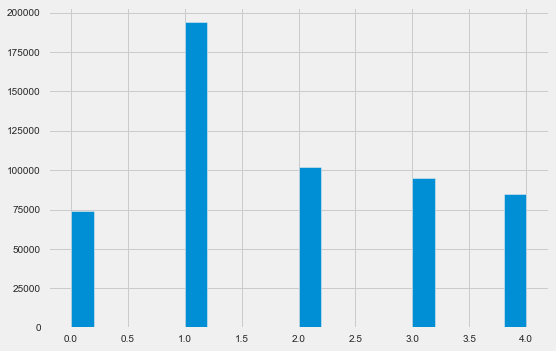

In [24]:
plt.style.use(style='fivethirtyeight')
traindf.Stay_In_Current_City_Years.hist(bins=20)

## People who stay less in a particular city purchase more

### Feature - 'Marital_ Status'  (countplot)

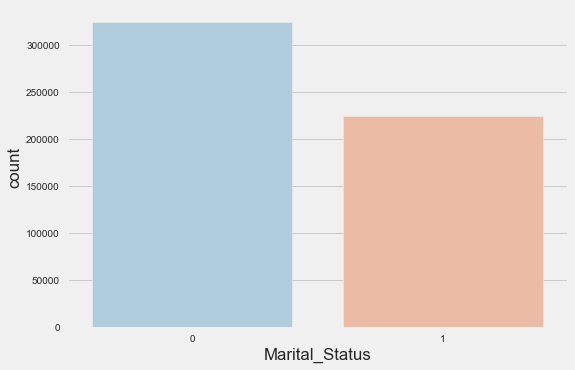

In [25]:
sns.countplot(x='Marital_Status', data=traindf, palette='RdBu_r')

## The pandas profile report told us that Marital status column is a boolean value so the plot suggests that unmarried people have a higher purchase value than married people which is not surprising at all.


###  Feature - 'Product_Category'  (box plot)`

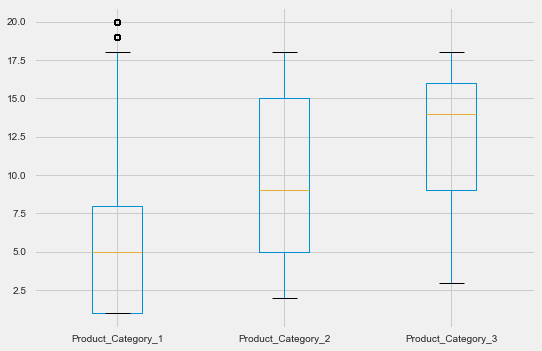

In [26]:
traindf[['Product_Category_1','Product_Category_2','Product_Category_3']].plot.box()

## Here we can see that product category1 has got some outliers which needs to be removed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4C454F508>,
      dtype=object)

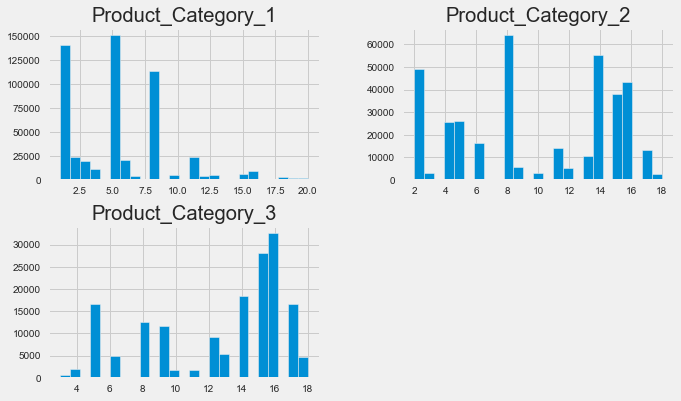

In [27]:
traindf[['Product_Category_1','Product_Category_2','Product_Category_3']].hist(bins=25,figsize = (10,6))

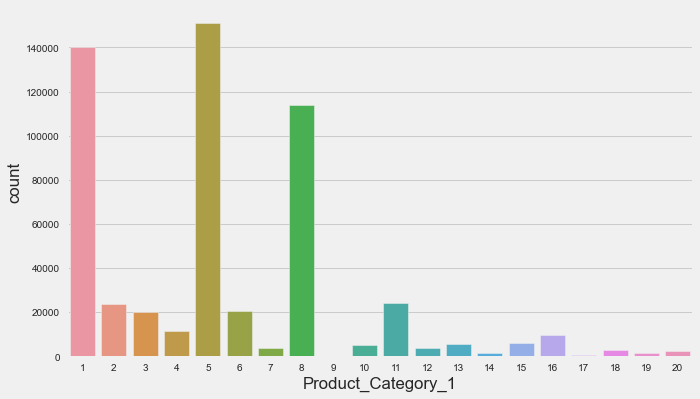

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(traindf.Product_Category_1)

##  Products 1, 5 and 8 were purchased the most from Category 1

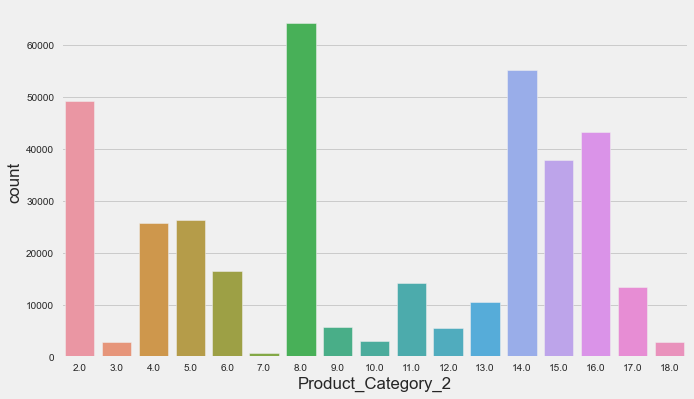

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(traindf.Product_Category_2)

## Products 2, 8 and 14 were purchased the most from Category 2

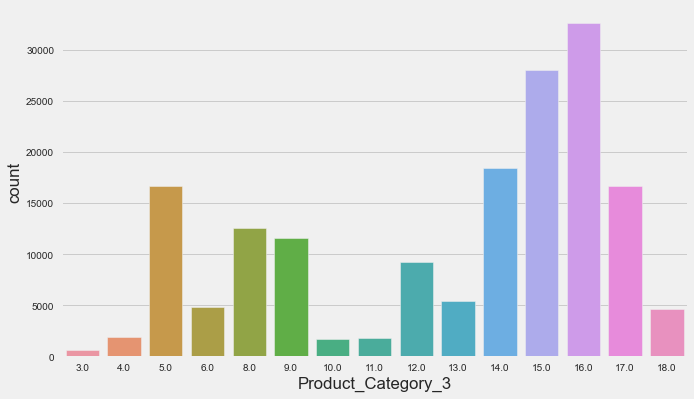

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(traindf.Product_Category_3)

## Products 16 and 15 were purchased the most from Category 3

### Multi-Variate Graphs

In [31]:
traindf['combined_G_M'] = traindf.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(traindf['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


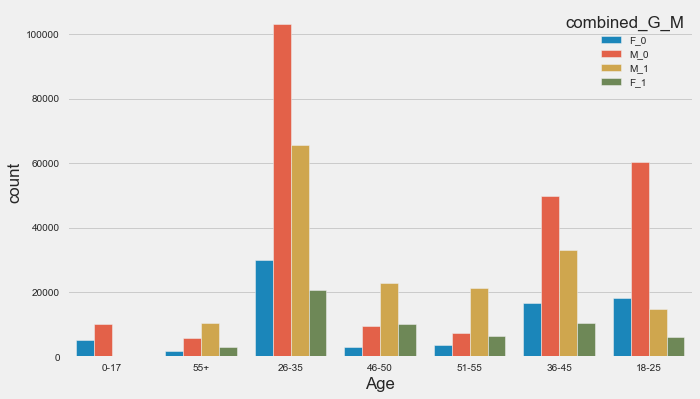

In [32]:
plt.style.use(style='fivethirtyeight')
plt.figure(figsize=(10,6))
sns.countplot(traindf['Age'],hue=traindf['combined_G_M'])

In [35]:
traindf['combined_P'] = traindf.apply(lambda x:'%s_%s' % (x['Gender'],x['City_Category']),axis=1)
print(traindf['combined_P'].unique())

['F_A' 'M_C' 'M_A' 'M_B' 'F_B' 'F_C']


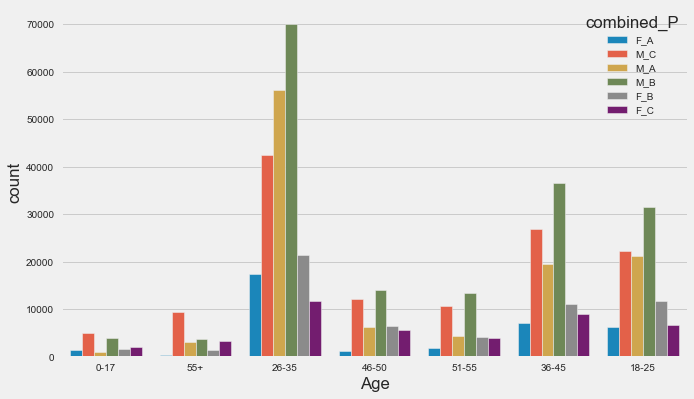

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(traindf['Age'],hue=traindf['combined_P'])

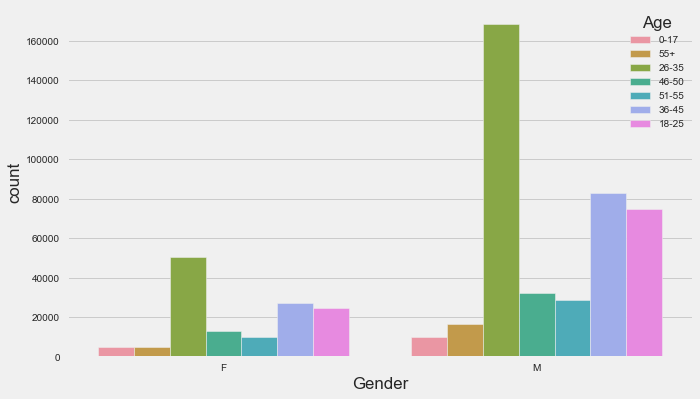

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=traindf, x=traindf.Gender, hue=traindf.Age)

# Conclusions:

##### Men shop more during the Black Friday  sales more than women.
##### People who are in age group 26-35 have the highest purchase rate in Black Friday much more than others.Followed by 36-45, 18-25, 46-50, 51-55, 55+ and 0-17
##### We can't do much conclusions here, but people from 0 and 4 occupation number shop more than any other occupation which can can only mean on thing, they have higher paying jobs.
##### People who live in City B purchased a lot more than others followed by City C and A. We can see that, people who lives in City A and C spent almost the same.
##### People who are not married buy a lot during the sales.
##### People who stay less in a particular city shop more during Black Friday sales than people who live in the same city for years. The exception is who has less than 1 (one) year.
##### Product category 1 has some outliers which need to be removed.